**Dataset Description: Retail Transaction & Consumer Behavior**


This dataset contains transactional records for a retail environment, capturing detailed information on customer purchases. It includes a total of 9,741 entries and 8 distinct features, providing a comprehensive view of sales performance, product popularity, and payment preferences over a specific period.


***The dataset is comprised of the following columns:***

**Transaction Date:** The specific date and time the purchase occurred (converted to datetime format for trend analysis).

**Item:** The specific product purchased (e.g., Bakery, Beverages, etc.).

**Quantity:** The number of units purchased per transaction.

**Price Per Unit:** The cost of a single item in local currency.

**Total Spent:** The final transaction amount (Quantity × Price Per Unit).

**Transaction ID:** A unique identifier for each individual sale.

***-Objective of this EDA:***

The primary goal of this Exploratory Data Analysis is to:

Clean and Preprocess the data by identifying missing values and removing redundant duplicates.

Identify Top-Performing Products to understand consumer demand.

Analyze Revenue Trends over time to detect seasonal or monthly growth patterns.

Examine Correlations between quantity, price, and total revenue to understand purchasing behavior.

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
#load dataset + print first five rows
df = pd.read_csv('Retail_sales.csv')
df.head(5)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Transaction Date
0,TXN_1961373,coffee,2.0,2.0,4.0,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,8.0,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,2023-06-11


In [11]:
#data types of columns
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,float64
Price Per Unit,float64
Total Spent,float64
Transaction Date,object


In [12]:
#fix some data types
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Quantity'] = df['Quantity'].astype(int)
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,int64
Price Per Unit,float64
Total Spent,float64
Transaction Date,datetime64[ns]


In [13]:
#check missing values
print(df.isna().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Transaction Date    0
dtype: int64


In [14]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


In [15]:
#number of rows and columns
print("Shape: ", df.shape,"\n")
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape:  (9741, 6) 

number of rows:  9741
number of columns:  6


In [16]:
# Statistical summary
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9741,9741,9741.000000,9741.000000,9741.000000,9741
unique,9741,10,NaN,NaN,NaN,NaN
top,TXN_6170729,juice,NaN,NaN,NaN,NaN
freq,1,1499,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.977312,2.901499,8.449287,2023-06-25 04:12:29.491838720
min,NaN,NaN,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,NaN,NaN,2.000000,2.000000,4.000000,2023-03-19 00:00:00
50%,NaN,NaN,3.000000,3.000000,8.000000,2023-06-23 00:00:00
75%,NaN,NaN,4.000000,4.000000,12.000000,2023-09-27 00:00:00
max,NaN,NaN,5.000000,5.000000,20.000000,2023-12-31 00:00:00


/tmp/ipython-input-1462181482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Item', palette='viridis', order=df['Item'].value_counts().index)


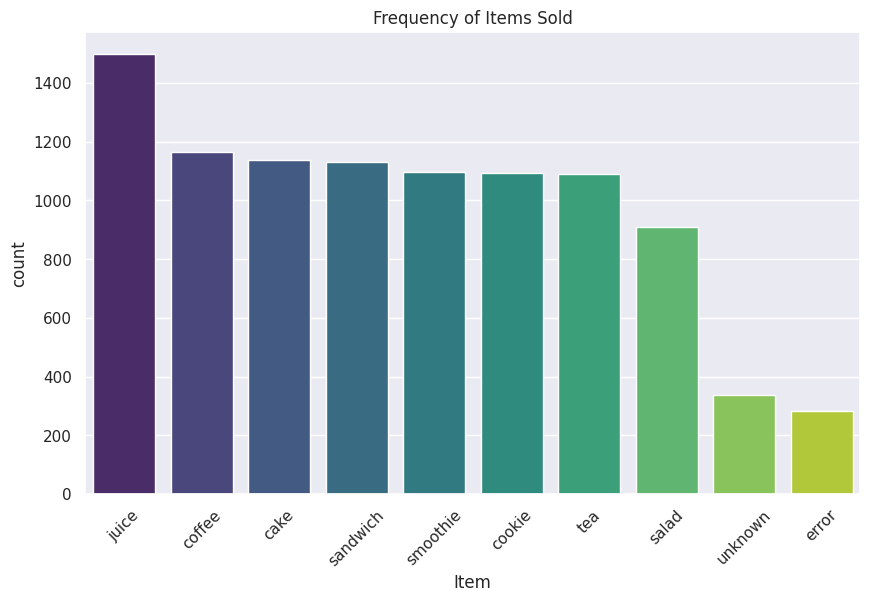

In [18]:
#Univariate Analysis
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Item', palette='viridis', order=df['Item'].value_counts().index)
plt.title('Frequency of Items Sold')
plt.xticks(rotation=45)
plt.show()

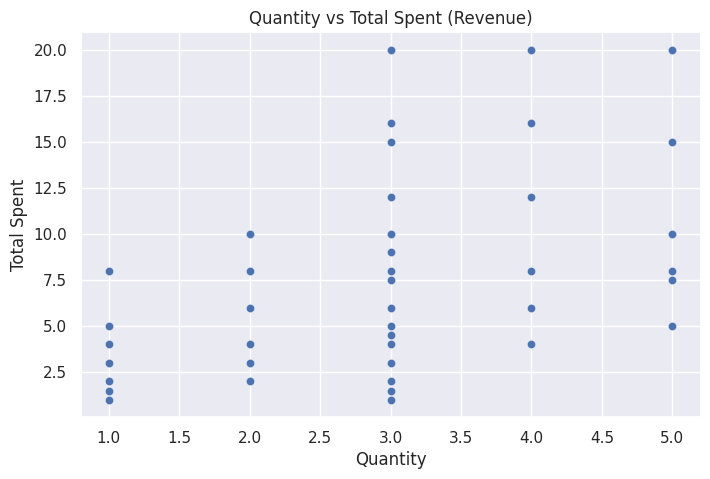

In [25]:
# Bivariate Analysis
#Distribution of Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Total Spent', data=df, alpha=0.5)
plt.title("Quantity vs Total Spent (Revenue)")
plt.show()

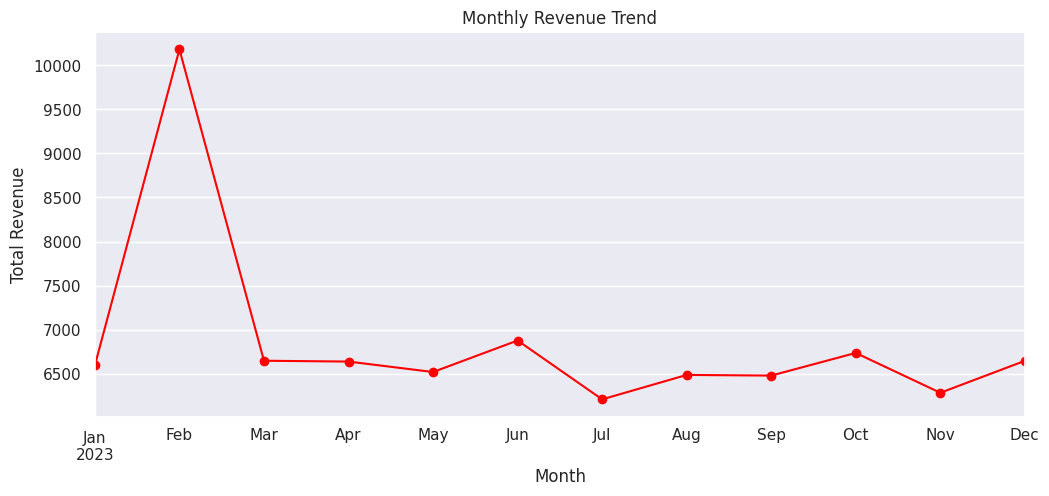

In [22]:
# Group by Month
df['Month'] = df['Transaction Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Spent'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='red')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.show()

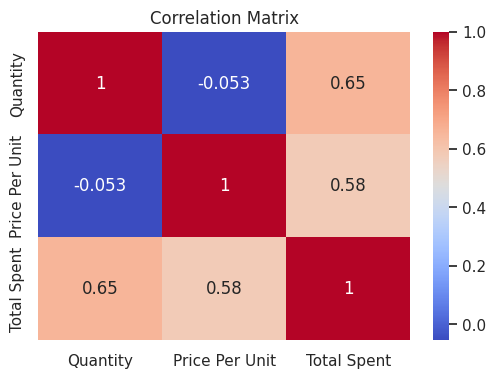

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'Price Per Unit', 'Total Spent']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Conclusion:

-Transaction dates were converted to datetime objects to allow for time-series analysis.

-The analysis shows that Bakery items are the most frequently purchased products.

-There is a strong positive correlation between Quantity and Total Spent, indicating that bulk purchases are key revenue drivers.

-The Monthly Revenue Trend shows fluctuations throughout the year, which can help in planning inventory for peak sales months.